 ## Q2. Extract reviews of any product from ecommerce website like amazon and Perform emotion mining.

### Extraction 

In [1]:
# STEP 1:
# Extract Amazon Reviews using Scrapy
!pip install scrapy

In [2]:
#STEP 2:
# To create a scrapy project use following command in cmd prompt.
## scrapy startproject Scrape_AmazonReviews

In [3]:
#STEP 3:
# To create a spider, you can type in following command in same cmd prompt.
## scrapy genspider amazon_review https://www.amazon.in/

In [4]:
# The "amazon_review.py" file contains below scrapy parser code:

import scrapy

class AmazonReviewSpider(scrapy.Spider):
    name = 'amazon_review'
    allowed_domains = ['amazon.in']
    start_urls = ['http://amazon.in']

    def parse(self, response):
        pass

In [5]:
#STEP 4:
# Then we need to define a parse function that gets fired up whenever our spider visits a new page.
# Below is a code sample of Scrapy parser for scraping Amazon reviews. 
# let's name the file as "extract_reiews.py" and save it in "Scrape_AmazonReviews\Scrape_AmazonReviews\spiders" folder.

In [6]:
import scrapy

class AmazonReviewsSpider(scrapy.Spider):

    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']

    # Base URL for the product reviews
    myBaseUrl = "https://www.amazon.in/product-reviews/9387779262/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')
            
            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars': 
                      ''.join(review.xpath('.//text()').extract()),
                      'comment': 
                          ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1


In [7]:
#STEP 5:
# To run this spider, open cmd prompt and type below command:
## scrapy runspider Scrape_AmazonReviews\Scrape_AmazonReviews\spiders\extract_reviews.py -o extract_reviews.csv
# The extracted "extract_reviews.csv" will get saved to default directory.

In [8]:
import pandas as pd
book=pd.read_csv('extract_reviews.csv')
book

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I think size of th...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n One of the best pu...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Very helpful\n \n
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good awsome\n \n
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Fantastic quality\...
...,...,...
1195,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Size of the books ...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Pages were good qu...
1197,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Really cute books...
1198,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It's a great book ...


In [9]:
#STEP 6:
# Testing our code for different product reviews. For egs: Bosch washing machine front load with weblink,
# Then, run cmd and use following command in cmd prompt
## scrapy runspider Scrape_AmazonReviews\Scrape_AmazonReviews\spiders\extract_reviews_test2.py -o extract_reviews_test2.csv
# And reading it using pandas python.

In [10]:
import scrapy

class AmazonReviewsSpider(scrapy.Spider):

    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']

    # Base URL for the product reviews
    myBaseUrl = "https://www.amazon.in/Bosch-Inverter-Control-Automatic-Loading/product-reviews/B08SR372S7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')
            
            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars': 
                      ''.join(review.xpath('.//text()').extract()),
                      'comment': 
                          ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1

In [11]:
import pandas as pd
book2=pd.read_csv("extract_reviews_test2.csv")
book2

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n सफेद कपड़े ठीक से नही न...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Bought it after us...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n We did not buy a f...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is best washi...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Previously I was u...
...,...,...
1226,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n Good performance,\..."
1227,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \n
1228,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good product at go...
1229,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Value for money......


In [12]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import string
import spacy
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [13]:
# Import extracted amazon reviews Dataset
reviews=pd.read_csv("C:/Users/Dhanashree/extract_reviews_test2.csv")
reviews

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n सफेद कपड़े ठीक से नही न...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Bought it after us...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n We did not buy a f...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is best washi...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Previously I was u...
...,...,...
1226,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n Good performance,\..."
1227,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \n
1228,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good product at go...
1229,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Value for money......


### Text Preprocessing

In [14]:
# remove both the leading and the trailing characters
review=[str(comment).strip() for comment in reviews.comment] 

# remove empty strings, because they are considered in Python as False
review=[comment for comment in review if comment] 
review[0:10]

['सफेद कपड़े ठीक से नही निकलते',
 'Bought it after using IFB for 10 years, very clear and positive difference between the two. Bosch is a lot more silent, and gives better quality wash VS iFB. Overall delivery and installation experience  was hassle free',
 'We did not buy a front load washing machine for a king time thinking that the water pressure in our tap would not be enough. We were proven wrong as Bosch washing machine worked without any issues. The cleaning performance and time is also amazing. Definitely recommend this or 6kg version to anyone. The 6kg version is cheaper by 6k inr.',
 'This is best washing machine...',
 'Previously I was using Samsung top load washing machine, Bosch front load is far superior, Wash quality is excellent .No noise or vibration',
 'Less noice, more washing programs. Recommended product.',
 'Good washing machine',
 'Good product and Bosch standard is diffent level. I am reducing one star because of Amazon. Poor installation service from Amazon. I h

In [15]:
# Joining the list into one string/text

reviews_text=' '.join(review)
reviews_text

'सफेद कपड़े ठीक से नही निकलते Bought it after using IFB for 10 years, very clear and positive difference between the two. Bosch is a lot more silent, and gives better quality wash VS iFB. Overall delivery and installation experience  was hassle free We did not buy a front load washing machine for a king time thinking that the water pressure in our tap would not be enough. We were proven wrong as Bosch washing machine worked without any issues. The cleaning performance and time is also amazing. Definitely recommend this or 6kg version to anyone. The 6kg version is cheaper by 6k inr. This is best washing machine... Previously I was using Samsung top load washing machine, Bosch front load is far superior, Wash quality is excellent .No noise or vibration Less noice, more washing programs. Recommended product. Good washing machine Good product and Bosch standard is diffent level. I am reducing one star because of Amazon. Poor installation service from Amazon. I have to contact Bosch for inst

In [16]:
# Remove Punctuations 

no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'सफेद कपड़े ठीक से नही निकलते Bought it after using IFB for 10 years very clear and positive difference between the two Bosch is a lot more silent and gives better quality wash VS iFB Overall delivery and installation experience  was hassle free We did not buy a front load washing machine for a king time thinking that the water pressure in our tap would not be enough We were proven wrong as Bosch washing machine worked without any issues The cleaning performance and time is also amazing Definitely recommend this or 6kg version to anyone The 6kg version is cheaper by 6k inr This is best washing machine Previously I was using Samsung top load washing machine Bosch front load is far superior Wash quality is excellent No noise or vibration Less noice more washing programs Recommended product Good washing machine Good product and Bosch standard is diffent level I am reducing one star because of Amazon Poor installation service from Amazon I have to contact Bosch for installation and they imm

In [17]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dhanashree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dhanashree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['सफेद', 'कपड़े', 'ठीक', 'से', 'नही', 'निकलते', 'Bought', 'it', 'after', 'using', 'IFB', 'for', '10', 'years', 'very', 'clear', 'and', 'positive', 'difference', 'between', 'the', 'two', 'Bosch', 'is', 'a', 'lot', 'more', 'silent', 'and', 'gives', 'better', 'quality', 'wash', 'VS', 'iFB', 'Overall', 'delivery', 'and', 'installation', 'experience', 'was', 'hassle', 'free', 'We', 'did', 'not', 'buy', 'a', 'front', 'load']


In [19]:
len(text_tokens)

34091

In [20]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['सफेद', 'कपड़े', 'ठीक', 'से', 'नही', 'निकलते', 'Bought', 'using', 'IFB', '10', 'years', 'clear', 'positive', 'difference', 'two', 'Bosch', 'lot', 'silent', 'gives', 'better', 'quality', 'wash', 'VS', 'iFB', 'Overall', 'delivery', 'installation', 'experience', 'hassle', 'free', 'We', 'buy', 'front', 'load', 'washing', 'machine', 'king', 'time', 'thinking', 'water', 'pressure', 'tap', 'would', 'enough', 'We', 'proven', 'wrong', 'Bosch', 'washing', 'machine', 'worked', 'without', 'issues', 'cleaning', 'performance', 'time', 'also', 'amazing', 'Definitely', 'recommend', '6kg', 'version', 'anyone', '6kg', 'version', 'cheaper', '6k', 'inr', 'This', 'best', 'washing', 'machine', 'Previously', 'using', 'Samsung', 'top', 'load', 'washing', 'machine', 'Bosch', 'front', 'load', 'far', 'superior', 'Wash', 'quality', 'excellent', 'No', 'noise', 'vibration', 'Less', 'noice', 'washing', 'programs', 'Recommended', 'product', 'Good', 'washing', 'machine', 'Good', 'product', 'Bosch', 'standard', 'diffen

In [21]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['सफेद', 'कपड़े', 'ठीक', 'से', 'नही', 'निकलते', 'bought', 'using', 'ifb', '10', 'years', 'clear', 'positive', 'difference', 'two', 'bosch', 'lot', 'silent', 'gives', 'better', 'quality', 'wash', 'vs', 'ifb', 'overall', 'delivery', 'installation', 'experience', 'hassle', 'free', 'we', 'buy', 'front', 'load', 'washing', 'machine', 'king', 'time', 'thinking', 'water', 'pressure', 'tap', 'would', 'enough', 'we', 'proven', 'wrong', 'bosch', 'washing', 'machine', 'worked', 'without', 'issues', 'cleaning', 'performance', 'time', 'also', 'amazing', 'definitely', 'recommend', '6kg', 'version', 'anyone', '6kg', 'version', 'cheaper', '6k', 'inr', 'this', 'best', 'washing', 'machine', 'previously', 'using', 'samsung', 'top', 'load', 'washing', 'machine', 'bosch', 'front', 'load', 'far', 'superior', 'wash', 'quality', 'excellent', 'no', 'noise', 'vibration', 'less', 'noice', 'washing', 'programs', 'recommended', 'product', 'good', 'washing', 'machine', 'good', 'product', 'bosch', 'standard', 'diffen

In [22]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['सफेद', 'कपड़े', 'ठीक', 'से', 'नही', 'निकलते', 'bought', 'use', 'ifb', '10', 'year', 'clear', 'posit', 'differ', 'two', 'bosch', 'lot', 'silent', 'give', 'better', 'qualiti', 'wash', 'vs', 'ifb', 'overal', 'deliveri', 'instal', 'experi', 'hassl', 'free', 'we', 'buy', 'front', 'load', 'wash', 'machin', 'king', 'time', 'think', 'water', 'pressur', 'tap', 'would', 'enough', 'we', 'proven', 'wrong', 'bosch', 'wash', 'machin', 'work', 'without', 'issu', 'clean', 'perform', 'time', 'also', 'amaz', 'definit', 'recommend', '6kg', 'version', 'anyon', '6kg', 'version', 'cheaper', '6k', 'inr', 'thi', 'best', 'wash', 'machin', 'previous', 'use', 'samsung', 'top', 'load', 'wash', 'machin', 'bosch', 'front', 'load', 'far', 'superior', 'wash', 'qualiti', 'excel', 'no', 'nois', 'vibrat', 'less', 'noic', 'wash', 'program', 'recommend', 'product', 'good', 'wash', 'machin', 'good', 'product', 'bosch', 'standard', 'diffent', 'level', 'reduc', 'one', 'star', 'amazon', 'poor', 'instal', 'servic', 'amazon', 

In [23]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

सफेद कपड़े ठीक से नही निकलते bought using ifb 10 years clear positive difference two bosch lot silent gives better quality wash vs ifb overall delivery installation experience hassle free we buy front load washing machine king time thinking water pressure tap would enough we proven wrong bosch washing machine worked without issues cleaning performance time also amazing definitely recommend 6kg version anyone 6kg version cheaper 6k inr this best washing machine previously using samsung top load washing machine bosch front load far superior wash quality excellent no noise vibration less noice washing programs recommended product good washing machine good product bosch standard diffent level reducing one star amazon poor installation service amazon contact bosch installation immediately helped zero cost very good performance clothes cleaned satisfying manner silent cant even make running number washing options average wash time 45 mins 2 sections detergent 1 conditioner so able use fresh d

In [24]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['सफेद', 'कपड़े', 'ठीक', 'से', 'नही', 'निकलते', 'buy', 'use', 'ifb', '10', 'year', 'clear', 'positive', 'difference', 'two', 'bosch', 'lot', 'silent', 'give', 'well', 'quality', 'wash', 'vs', 'ifb', 'overall', 'delivery', 'installation', 'experience', 'hassle', 'free', 'we', 'buy', 'front', 'load', 'washing', 'machine', 'king', 'time', 'think', 'water', 'pressure', 'tap', 'would', 'enough', 'we', 'prove', 'wrong', 'bosch', 'washing', 'machine', 'work', 'without', 'issue', 'clean', 'performance', 'time', 'also', 'amazing', 'definitely', 'recommend', '6', 'kg', 'version', 'anyone', '6', 'kg', 'version', 'cheap', '6k', 'inr', 'this', 'good', 'washing', 'machine', 'previously', 'use', 'samsung', 'top', 'load', 'washing', 'machine', 'bosch', 'front', 'load', 'far', 'superior', 'wash', 'quality', 'excellent', 'no', 'noise', 'vibration', 'less', 'noice', 'washing', 'program', 'recommend', 'product', 'good', 'washing', 'machine', 'good', 'product', 'bosch', 'standard', 'diffent', 'level', 'redu

In [25]:
clean_reviews=' '.join(lemmas)
clean_reviews

"सफेद कपड़े ठीक से नही निकलते buy use ifb 10 year clear positive difference two bosch lot silent give well quality wash vs ifb overall delivery installation experience hassle free we buy front load washing machine king time think water pressure tap would enough we prove wrong bosch washing machine work without issue clean performance time also amazing definitely recommend 6 kg version anyone 6 kg version cheap 6k inr this good washing machine previously use samsung top load washing machine bosch front load far superior wash quality excellent no noise vibration less noice washing program recommend product good washing machine good product bosch standard diffent level reduce one star amazon poor installation service amazon contact bosch installation immediately help zero cost very good performance clothe clean satisfy manner silent can not even make run number washing option average wash time 45 min 2 section detergent 1 conditioner so able use fresh detergent 2 separate cyclesnote please

In [26]:
#Feature Extaction
#1. Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)
print(cv.vocabulary_)

{'सफ': 1368, 'कपड़': 1365, 'नह': 1367, 'कलत': 1366, 'buy': 197, 'use': 1272, 'ifb': 583, '10': 2, 'year': 1358, 'clear': 243, 'positive': 897, 'difference': 352, 'two': 1246, 'bosch': 175, 'lot': 696, 'silent': 1097, 'give': 511, 'well': 1325, 'quality': 948, 'wash': 1307, 'vs': 1300, 'overall': 843, 'delivery': 335, 'installation': 616, 'experience': 435, 'hassle': 538, 'free': 490, 'we': 1318, 'front': 496, 'load': 684, 'washing': 1308, 'machine': 703, 'king': 647, 'time': 1226, 'think': 1215, 'water': 1312, 'pressure': 907, 'tap': 1190, 'would': 1351, 'enough': 411, 'prove': 935, 'wrong': 1356, 'work': 1344, 'without': 1341, 'issue': 629, 'clean': 241, 'performance': 868, 'also': 85, 'amazing': 90, 'definitely': 331, 'recommend': 972, 'kg': 644, 'version': 1289, 'anyone': 105, 'cheap': 228, '6k': 43, 'inr': 609, 'this': 1217, 'good': 514, 'previously': 911, 'samsung': 1031, 'top': 1232, 'far': 446, 'superior': 1174, 'excellent': 424, 'no': 789, 'noise': 792, 'vibration': 1294, 'less'

In [27]:
print(cv.get_feature_names()[150:300])

['be', 'bear', 'bearing', 'become', 'before', 'beginninghad', 'behaviour', 'behavioureven', 'belt', 'bent', 'bery', 'bet', 'between', 'beware', 'big', 'biharb', 'bill', 'bit', 'block', 'board', 'bogas', 'bolt', 'book', 'booster', 'borne', 'bosch', 'bosche', 'boschrecently', 'bosh', 'boss', 'bother', 'bottom', 'bought', 'box', 'boy', 'brand', 'brilliant', 'bring', 'bt', 'budget', 'build', 'building', 'bulky', 'burn', 'busy', 'but', 'button', 'buy', 'buyback', 'buyer', 'buying', 'buzzeswashe', 'by', 'bycycle', 'bye', 'cable', 'call', 'callword', 'calm', 'came', 'can', 'cancel', 'capacity', 'card', 'care', 'carry', 'case', 'cash', 'cause', 'caution', 'center', 'centre', 'certify', 'challenge', 'champ', 'change', 'charge', 'charmwashe', 'cheap', 'cheat', 'check', 'chest', 'child', 'choice', 'choose', 'chose', 'circuit', 'circular', 'cisit', 'city4stand', 'class', 'clean', 'cleaning', 'clear', 'cloath', 'close', 'cloth', 'clothe', 'clothing', 'cloudtail', 'cockfor', 'collar', 'color', 'comb

C:\Users\Dhanashree\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(reviewscv.toarray().shape)

(20982, 1369)


In [30]:
#2. CountVectorizer with N-grams (Bigrams & Trigrams)
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['15', 'also', 'amazon', 'back', 'bad', 'bosch', 'build', 'buy', 'call', 'change', 'clean', 'clothe', 'come', 'company', 'compare', 'cost', 'could', 'customer', 'day', 'deliver', 'delivery', 'do', 'drum', 'easy', 'even', 'excellent', 'far', 'first', 'front', 'get', 'give', 'go', 'good', 'great', 'happy', 'ifb', 'inlet', 'installation', 'issue', 'its', 'keep', 'kg', 'less', 'level', 'like', 'load', 'look', 'love', 'low', 'machine', 'make', 'may', 'medium', 'money', 'month', 'need', 'nice', 'no', 'noise', 'not', 'one', 'part', 'performance', 'person', 'pipe', 'please', 'pressure', 'price', 'product', 'purchase', 'quality', 'quite', 'really', 'recommend', 'run', 'say', 'see', 'service', 'since', 'stand', 'support', 'take', 'tap', 'technician', 'thank', 'thing', 'this', 'till', 'time', 'use', 'value', 'very', 'wash', 'washing', 'water', 'we', 'well', 'work', 'worth', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 

In [31]:
#3. TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '15', '1st', 'able', 'absolutely', 'accept', 'accessory', 'action', 'adapter', 'add', 'additional', 'after', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'and', 'anti', 'anyone', 'appliance', 'around', 'as', 'ask', 'automatic', 'available', 'average', 'awesome', 'back', 'bad', 'be', 'bear', 'big', 'bill', 'bit', 'board', 'bosch', 'bosh', 'bother', 'brand', 'build', 'but', 'buy', 'buying', 'call', 'can', 'care', 'center', 'change', 'charge', 'cheap', 'check', 'choose', 'class', 'clean', 'clear', 'close', 'cloth', 'clothe', 'come', 'comme', 'company', 'compare', 'complaint', 'complete', 'completely', 'con', 'condition', 'connect', 'consumption', 'contact', 'control', 'cord', 'cost', 'could', 'cover', 'current', 'customer', 'cycle', 'damage', 'date', 'day', 'deal', 'definitely', 'deliver', 'delivery', 'demo', 'design', 'detail', 'detergent', 'directly', 'dirt', 'disappointed', 'discount', 'do', 'door', 'drum', 'dry', 'due', 'during', 'dusseh

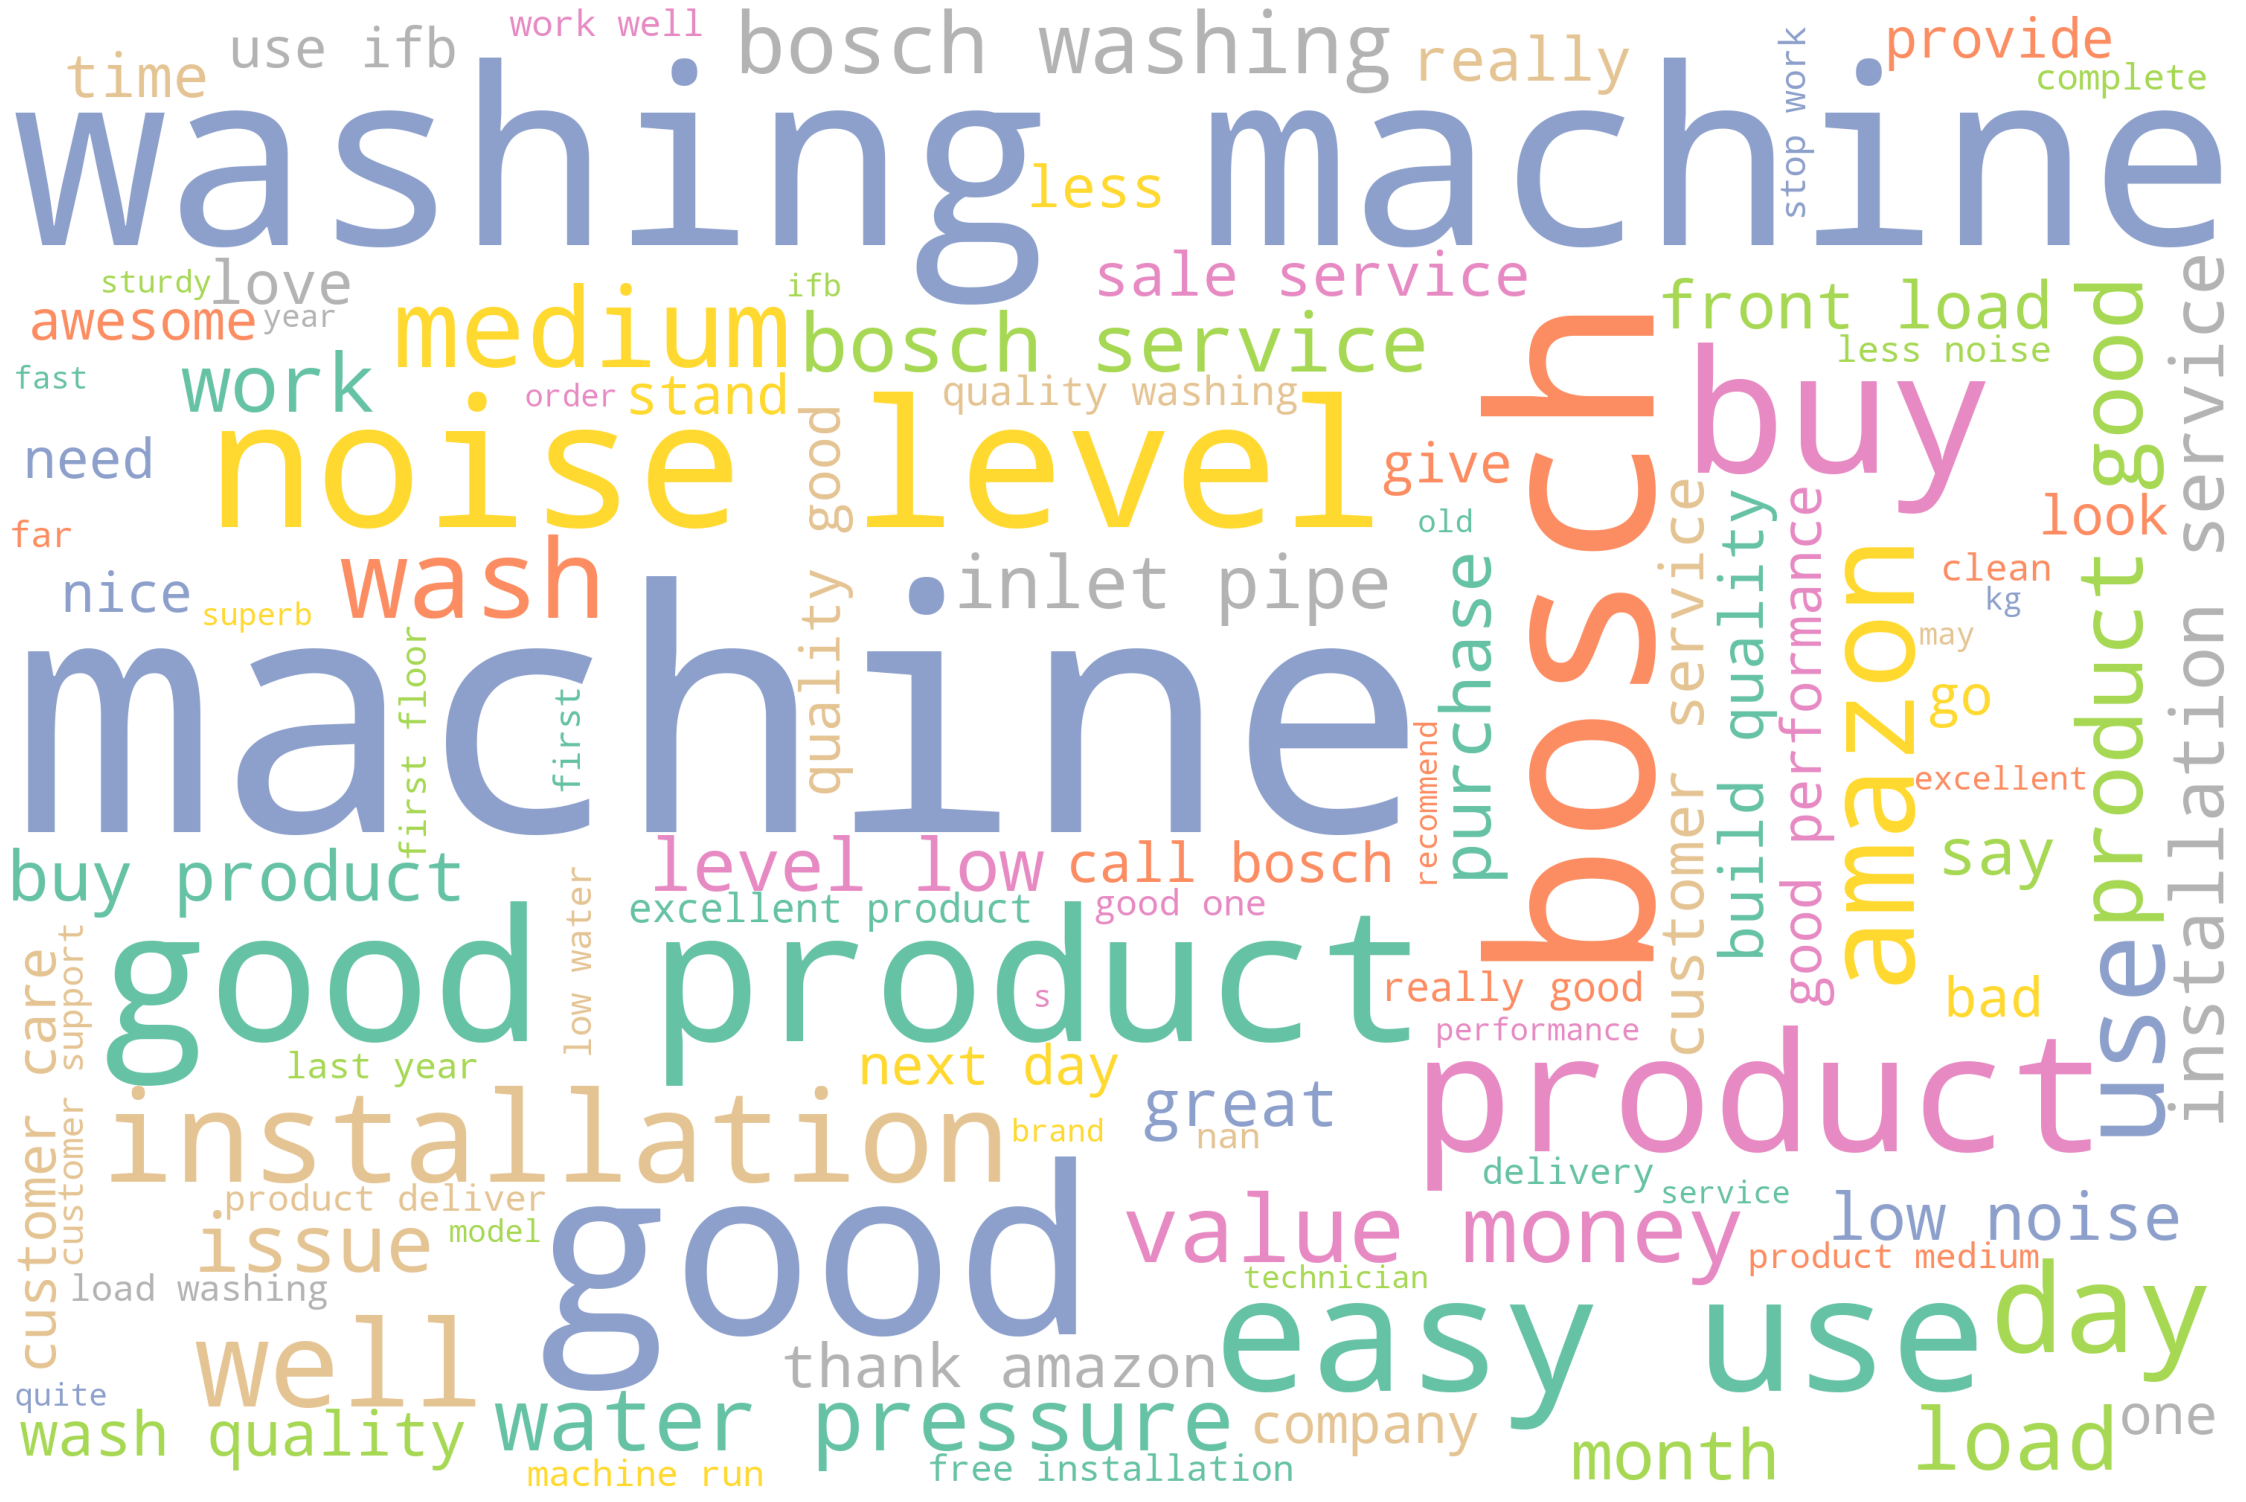

In [32]:
#Generate Word Cloud
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

In [33]:
#Named Entity Recognition (NER)
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [34]:
for token in doc_block[100:200]:
    print(token,token.pos_)

machine NOUN
good ADJ
product NOUN
bosch VERB
standard ADJ
diffent NOUN
level NOUN
reduce VERB
one NUM
star NOUN
amazon PROPN
poor ADJ
installation NOUN
service NOUN
amazon PROPN
contact PROPN
bosch PROPN
installation NOUN
immediately ADV
help VERB
zero NUM
cost VERB
very ADV
good ADJ
performance NOUN
clothe NOUN
clean PROPN
satisfy PROPN
manner PROPN
silent ADJ
can AUX
not PART
even ADV
make VERB
run NOUN
number NOUN
washing NOUN
option NOUN
average ADJ
wash NOUN
time NOUN
45 NUM
min NOUN
2 NUM
section NOUN
detergent NOUN
1 NUM
conditioner NOUN
so ADV
able ADJ
use VERB
fresh ADJ
detergent NOUN
2 NUM
separate ADJ
cyclesnote NOUN
please INTJ
check VERB
water NOUN
pressure NOUN
buying NOUN
may AUX
work VERB
low ADJ
water NOUN
pressureoverall NOUN
good PROPN
buy VERB
absolutely ADV
value NOUN
money NOUN
product NOUN
good ADJ
service NOUN
person NOUN
come VERB
home NOUN
installation NOUN
comme NOUN
without ADP
tool NOUN
comme PROPN
installationand PROPN
happy ADJ
service NOUN
person NOUN
i

In [35]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['service', 'person', 'improve', 'buy', 'washing', 'machine', 'uncle', 'home', 'use', 'lot', 'feature', 'accommodate', 'type', 'clothe', 'product', 'satisfy', 'let', 'talk', 'hit', 'first1', 'washing', 'quality2', 'wash', 'build', 'quality4', 'noise', 'temperature', 'installation', 'service', 'letdown', 'turn', 'scedule', 'time', 'date', 'self', 'call', 'center', 'fix', 'appointment', 'spend', 'day', 'explain', 'issue', 'customer', 'care', 'noone', 'turned', 'say', 'date', 'buy', 'product', 'call', 'care', 'installation', 'installation', 'team', 'come', 'day', 's', 'part2', 'accessory', 'upto', 'u', 'buy', 'stand', 'build', 'stand', 'accessory', 'price', 's', 'miss3', 'feel', 'build', 'quality', 'part', 'reason', 'receive', 'product', 'damage', 'part', 'press', 'put', 'pressure', 'machine', 'weight', 'drum', 'pipe', 'whomsoever', 'design', 'keep', 'pipe', 'meter', 'purchase', 'pipe', 'distance', 'meter', 'product', 'preferance', 'rely', 'installation']


In [36]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,machine,631
1,product,432
2,washing,315
3,service,280
4,use,276
5,installation,236
6,noise,208
7,buy,189
8,bosch,182
9,quality,144


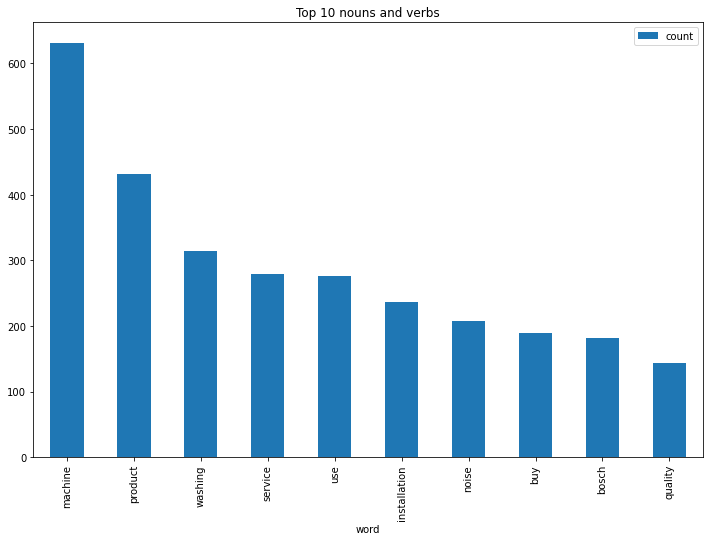

In [37]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [38]:
#Emotion Mining - Sentiment Analysis
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(review))
sentences

['सफेद कपड़े ठीक से नही निकलते Bought it after using IFB for 10 years, very clear and positive difference between the two.',
 'Bosch is a lot more silent, and gives better quality wash VS iFB.',
 'Overall delivery and installation experience  was hassle free We did not buy a front load washing machine for a king time thinking that the water pressure in our tap would not be enough.',
 'We were proven wrong as Bosch washing machine worked without any issues.',
 'The cleaning performance and time is also amazing.',
 'Definitely recommend this or 6kg version to anyone.',
 'The 6kg version is cheaper by 6k inr.',
 'This is best washing machine...',
 'Previously I was using Samsung top load washing machine, Bosch front load is far superior, Wash quality is excellent .No noise or vibration Less noice, more washing programs.',
 'Recommended product.',
 'Good washing machine Good product and Bosch standard is diffent level.',
 'I am reducing one star because of Amazon.',
 'Poor installation serv

In [39]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,सफेद कपड़े ठीक से नही निकलते Bought it after us...
1,"Bosch is a lot more silent, and gives better q..."
2,Overall delivery and installation experience ...
3,We were proven wrong as Bosch washing machine ...
4,The cleaning performance and time is also amaz...
...,...
2244,It’s again down with same part in month of Aug...
2245,As it’s a washing machine so not able to maint...
2246,They don’t have any service infrastructure and...
2247,It has been an awesome experience till now.


In [40]:
# Emotion Lexicon - Affin
affin=pd.read_csv("C:/Users/Dhanashree/Downloads/Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [41]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [42]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

# manual testing
calculate_sentiment(text='good service')

3

In [43]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        3
1        0
2        0
3       -2
4        4
        ..
2244    -3
2245    -2
2246     2
2247     4
2248    22
Name: sentiment_value, Length: 2249, dtype: int64

In [44]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       22
1       13
2       33
3       12
4        8
        ..
2244    25
2245    23
2246    13
2247     8
2248    37
Name: word_count, Length: 2249, dtype: int64

In [45]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
482,No problem Silent and efficient Automatic fron...,-6,89
2193,No problem Silent and efficient Automatic fron...,-6,89
431,We recieved damaged oneI canceled and refunded...,-6,14
1103,We recieved damaged oneI canceled and refunded...,-6,14
2068,We recieved damaged oneI canceled and refunded...,-6,14
...,...,...,...
570,Best washing machine in the world 🌍 i use whir...,21,80
135,Best washing machine in the world 🌍 i use whir...,21,80
1732,Best washing machine in the world 🌍 i use whir...,21,80
492,"Loving this from Bosch Good performance, Good ...",21,34


In [46]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    2249.000000
mean        1.302357
std         3.101802
min        -6.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        22.000000
Name: sentiment_value, dtype: float64

In [47]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,"Bosch is a lot more silent, and gives better q...",0,13
2,Overall delivery and installation experience ...,0,33
3,We were proven wrong as Bosch washing machine ...,-2,12
6,The 6kg version is cheaper by 6k inr.,0,8
11,I am reducing one star because of Amazon.,0,8
...,...,...,...
2241,Does the job.,0,3
2242,I have brought this machine Oct last year.,0,8
2243,It’s down in month of April and power module w...,0,11
2244,It’s again down with same part in month of Aug...,-3,25


In [48]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,सफेद कपड़े ठीक से नही निकलते Bought it after us...,3,22
4,The cleaning performance and time is also amaz...,4,8
5,Definitely recommend this or 6kg version to an...,2,8
7,This is best washing machine...,3,5
8,Previously I was using Samsung top load washin...,7,28
...,...,...,...
2239,Good The media could not be loaded.,3,7
2240,Good Nice product.,3,3
2246,They don’t have any service infrastructure and...,2,13
2247,It has been an awesome experience till now.,4,8


In [49]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,सफेद कपड़े ठीक से नही निकलते Bought it after us...,3,22,0
1,"Bosch is a lot more silent, and gives better q...",0,13,1
2,Overall delivery and installation experience ...,0,33,2
3,We were proven wrong as Bosch washing machine ...,-2,12,3
4,The cleaning performance and time is also amaz...,4,8,4
...,...,...,...,...
2244,It’s again down with same part in month of Aug...,-3,25,2244
2245,As it’s a washing machine so not able to maint...,-2,23,2245
2246,They don’t have any service infrastructure and...,2,13,2246
2247,It has been an awesome experience till now.,4,8,2247


C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

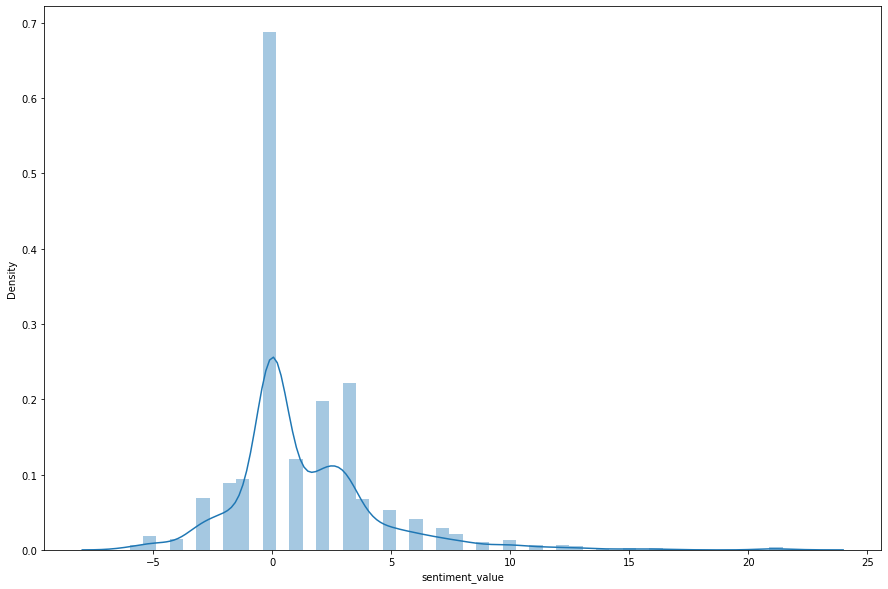

In [50]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

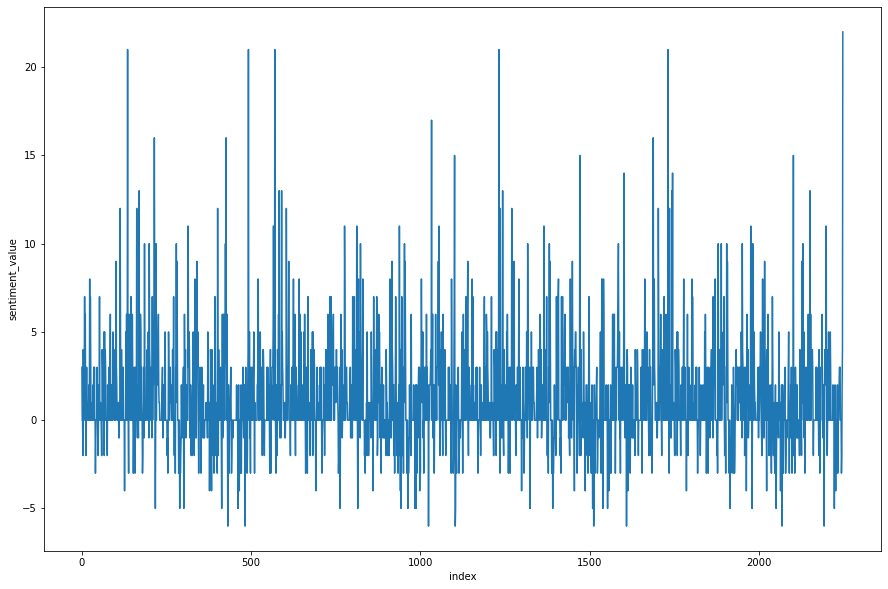

In [51]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)